# Time Frame 01: Before 2020 Election

### <u>DATA PREPARATION</u>

##### SETTING UP THE TWITTER API

In [ ]:
import os
import tweepy as tw
import pandas as pd

consumer_key = 'qWaI6kizU7SAcRNc6EnnoNChq'
consumer_secret = 'xumE7NgIZMiLCUXFeEl0pr3zhsuqdLvOPB0tG94HBQ8PgP2vsK'
access_token = '2747565082-8g1OYC9aFI4NxRInAV5ArxV1te4V6alDLHlQuNn'
access_token_secret = 'rDMmFApw3H5vL5KqVRxwRKdmJCkRdmrqjG8CCfmVroNKV'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

##### PREPARING THE COVID-19 VACCINE TWEETS DATASET (the dataset before 2020 election i.e. Sep 01 till Nov 01)

In [ ]:
'''
We are using 'snscrape' to collect the tweets.
For this package we will have to run the following commands in the command prompt/anaconda prompt of our computers:

snscrape twitter-search "#covid-19vaccine since:2020-09-01 until:2020-11-02" > frame1_tweets1.txt
snscrape twitter-search "#COVID-19Vaccine since:2020-09-01 until:2020-11-02" > frame1_tweets2.txt
snscrape twitter-search "#covidvaccine since:2020-09-01 until:2020-11-02" > frame1_tweets3.txt
snscrape twitter-search "#coronavirusvaccine since:2020-09-01 until:2020-11-02" > frame1_tweets4.txt
snscrape twitter-search "#coronavaccine since:2020-09-01 until:2020-11-02" > frame1_tweets5.txt

Each command is run separately in the prompt and returns URL ids for the tweets in a text file.
Then we will use the following commands to extract the URL ids and finally the tweet texts from the text files.

Reference: https://medium.com/@jcldinco/downloading-historical-tweets-using-tweet-ids-via-snscrape-and-tweepy-5f4ecbf19032
'''

# Converting the text files into a single pandas dataframe.
tweet_url = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\frame1_tweets1.txt", index_col= None, header = None, names = ["links"])
tweet_url2 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\frame1_tweets2.txt", index_col= None, header = None, names = ["links"])
tweet_url3 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\frame1_tweets3.txt", index_col= None, header = None, names = ["links"])
tweet_url4 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\frame1_tweets4.txt", index_col= None, header = None, names = ["links"])
tweet_url5 = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\frame1_tweets5.txt", index_col= None, header = None, names = ["links"])

tweet_url = tweet_url.append(tweet_url2, ignore_index=True)
tweet_url = tweet_url.append(tweet_url3, ignore_index=True)
tweet_url = tweet_url.append(tweet_url4, ignore_index=True)
tweet_url = tweet_url.append(tweet_url5, ignore_index=True)

# Splitting the URLs and getting the id of each tweet.
tweet_url['id'] = tweet_url.apply(lambda x: x["links"].split("/")[-1], axis=1)
# Saving the tweet ids in a list.
ids = tweet_url['id'].tolist()

# Defining function to get the text from each tweet.
def tweet_text(ids):
    tweet_status_list = api.statuses_lookup(ids, tweet_mode= "extended")
    text = pd.DataFrame()
    for status in tweet_status_list:
            tweet_text = {"tweet":status.full_text, "location": status.user.location}
            text = text.append(tweet_text, ignore_index = True)
    text.to_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\Vaccine Tweets (Time Frame 01).csv", mode="a")
    
# We divide our tweet ids into batches and run the above function on each batch. (Running on all the tweets ids together 
# raises error)
ids_count = len(ids)
batches = (ids_count - 1) // 50 + 1

for i in range(batches):
        batch = ids[i*50:(i+1)*50]
        result = tweet_text(batch)

covid_vaccine_data = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Time Frame 01\Vaccine Tweets (Time Frame 01).csv")
del covid_vaccine_data['Unnamed: 0']
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.tweet != 'tweet']
covid_vaccine_data.head()

location                                              tweet
0  Mumbai, India  Every Indian will get the corona vaccine, says...
1  Mumbai, India  दिसंबर 2020 तक तैयार हो सकती है कोविड-19 वैक्स...
2  Mumbai, India  डब्ल्यूएचओ ने कहा, दुनिया के लिए कोविड-19 जन स...
3        Manipal  #Udupi: @dcudupi instructs officials to prepar...
4    Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...

##### TRANSLATING THE COVID-19 VACCINE TWEETS DATASET

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\CovidProject-59fb431c583d.json"

translated_tweets = []

def translate_text(target, tweet_list):
    import six
    from google.cloud import translate_v2 as translate
    translate_client = translate.Client()
    
    for text in tweet_list:
        if not text:
            translated_tweets.append("")
        elif len(text) < 4:
            translated_tweets.append("")
        else:
            if isinstance(text, six.binary_type):
                text = text.decode("utf-8")
    
            result = translate_client.translate(text, target_language=target)
            translated_tweets.append(u"{}".format(result["translatedText"]))

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

tweets_list = covid_vaccine_data['tweet'].values.tolist()
tweets_sublists = chunkIt(tweets_list, 20)

for i in range(20):
    translate_text('en', tweets_sublists[i])
    
covid_vaccine_data['Translated Tweet'] = translated_tweets
covid_vaccine_data.head()    

location                                              tweet  \
0  Mumbai, India  Every Indian will get the corona vaccine, says...   
1  Mumbai, India  दिसंबर 2020 तक तैयार हो सकती है कोविड-19 वैक्स...   
2  Mumbai, India  डब्ल्यूएचओ ने कहा, दुनिया के लिए कोविड-19 जन स...   
3        Manipal  #Udupi: @dcudupi instructs officials to prepar...   
4    Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                    Translated Tweet  
0  Every Indian will get the corona vaccine, says...  
1  COVID-19 vaccine to be ready by December 2020 ...  
2  WHO said, Kovid-19 public health emergency con...  
3  #Udupi: @dcudupi instructs officials to prepar...  
4  Johnson &amp; Johnson resumes a Phase 3 trial ...

##### CLEANING AND PREPROCESSING THE COVID-19 VACCINE TWEETS DATASET

In [ ]:
import re
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
stop = stopwords.words('english')

def preprocess_word(tweet):
    processed_tweet = []
    words = tweet.split()
    for word in words:
        # Removing punctuation
        word = word.strip('\'"?!,.():;') 
        # Converting more than 2 letter repetitions to 2 letter e.g. funnnnny --> funny
        word = re.sub(r'(.)\1+', r'\1\1', word)  
        # Removing - & '
        word = re.sub(r'(-|\')', '', word)       
        processed_tweet.append(word)
    return ' '.join(processed_tweet)
    
covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Translated Tweet'].apply(lambda x: preprocess_word(x))

def is_valid_word(tweet):
    processed_tweet = []
    words = tweet.split()
    for word in words:
        # Checking if word begins with an alphabet
        if re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None:
            processed_tweet.append(word)
    return ' '.join(processed_tweet)

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: is_valid_word(x))

def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: handle_emojis(x))

def preprocess_tweet(tweet):
    porter_stemmer = PorterStemmer()
    # Lower-casing
    tweet = tweet.lower()
    # Removing non-ascii characters i.e. characters with ascii value >= 128
    tweet = ''.join([w if ord(w) < 128 else ' ' for w in tweet])
    # Spelling correction
    tweet = str(TextBlob(tweet).correct())
    # Replacing URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    # Replacing @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    # Replacing #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Removing RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Replacing 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Stripping space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replacing multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    # Removing stop words
    processed_tweet = []
    words = tweet.split()
    for word in words:
        if word not in stop:
            processed_tweet.append(word)
    return ' '.join(processed_tweet)

covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: preprocess_tweet(x))

covid_vaccine_data = covid_vaccine_data.dropna(subset=['Clean Tweet'])
covid_vaccine_data = covid_vaccine_data.reset_index()
del covid_vaccine_data['index']

covid_vaccine_data['Clean Tweet'].replace("", np.nan, inplace=True)
covid_vaccine_data.dropna(subset=['Clean Tweet'], inplace=True)
covid_vaccine_data.head()

location                                              tweet  \
0  Mumbai, India  Every Indian will get the corona vaccine, says...   
1  Mumbai, India  दिसंबर 2020 तक तैयार हो सकती है कोविड-19 वैक्स...   
2  Mumbai, India  डब्ल्यूएचओ ने कहा, दुनिया के लिए कोविड-19 जन स...   
3        Manipal  #Udupi: @dcudupi instructs officials to prepar...   
4    Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                    Translated Tweet  \
0  Every Indian will get the corona vaccine, says...   
1  COVID-19 vaccine to be ready by December 2020 ...   
2  WHO said, Kovid-19 public health emergency con...   
3  #Udupi: @dcudupi instructs officials to prepar...   
4  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                         Clean Tweet  
0  every indian get corona vaccine says prime min...  
1      covid19 vaccine ready december covid19vaccine  
2  said kovid19 public health emergency concern w...  
3                instruct officials prepare database  
4  johnson johnson resumes phase trial finding ev...

### <u>SENTIMENT ANALYSIS</u>

In [ ]:
from transformers import BertForPreTraining

from transformers import pipeline
classifier = pipeline('sentiment-analysis')
covid_vaccine_data['Sentiment'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: classifier(x))

def get_label(x):
    x = str(x)
    if 'POSITIVE' in x:
        return 'Positive'
    if 'NEGATIVE' in x:
        return 'Negative'

covid_vaccine_data['Sentiment'] = covid_vaccine_data['Sentiment'].apply(lambda x: get_label(x))
covid_vaccine_data.head()

location                                              tweet  \
0  Mumbai, India  Every Indian will get the corona vaccine, says...   
1  Mumbai, India  दिसंबर 2020 तक तैयार हो सकती है कोविड-19 वैक्स...   
2  Mumbai, India  डब्ल्यूएचओ ने कहा, दुनिया के लिए कोविड-19 जन स...   
3        Manipal  #Udupi: @dcudupi instructs officials to prepar...   
4    Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                    Translated Tweet  \
0  Every Indian will get the corona vaccine, says...   
1  COVID-19 vaccine to be ready by December 2020 ...   
2  WHO said, Kovid-19 public health emergency con...   
3  #Udupi: @dcudupi instructs officials to prepar...   
4  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                         Clean Tweet Sentiment  
0  every indian get corona vaccine says prime min...  Negative  
1      covid19 vaccine ready december covid19vaccine  Negative  
2  said kovid19 public health emergency concern w...  Negative  
3                instruct officials prepare database  Positive  
4  johnson johnson resumes phase trial finding ev...  Negative

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

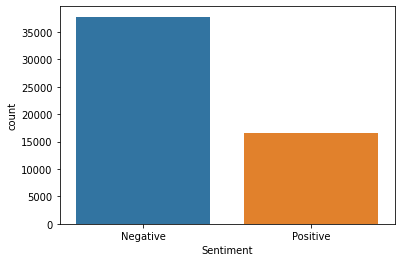

In [ ]:
# Plotting the distribution of sentiments
import seaborn as sns
import matplotlib as plt
sns.countplot(covid_vaccine_data['Sentiment'])

### <u>KEYWORD EXTRACTION</u>

In [ ]:
# Removing frequent words
high_freq = pd.Series(' '.join(covid_vaccine_data['Clean Tweet']).split()).value_counts()[:20]
high_freq = list(high_freq.index)
covid_vaccine_data['Clean Tweet'] = covid_vaccine_data['Clean Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))

# Extracting keywords
import yake
tweets = covid_vaccine_data['Clean Tweet'].to_list()
text = ' '.join(tweets)

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 50

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

(5.965993565144179e-08, 'kindly read blow')
(7.143264015738636e-08, 'great kindly read')
(7.75866514383896e-08, 'johnson johnson pauses')
(9.164149424694879e-08, 'minister harsh vardhan')
(1.2408157419759085e-07, 'active cases south')
(1.6496113846275103e-07, 'tail chief minister')
(1.7800297767376016e-07, 'union minister harsh')
(1.8524720182412863e-07, 'government chief minister')
(1.9299980145991127e-07, 'october active cases')
(2.0658701921417947e-07, 'great read blow')
(2.124024865391651e-07, 'cases south africa')
(2.3022021772646342e-07, 'supply million doses')
(2.3590457551938087e-07, 'developed oxford university')
(2.3736948244419174e-07, 'ready end year')
(2.4355452402010653e-07, 'september active cases')
(2.6477464370855446e-07, 'treatments doses market')
(2.7458758412975687e-07, 'country union minister')
(2.7673720956700196e-07, 'total active total')
(2.797035686762137e-07, 'minister narendra mode')
(2.820837547132731e-07, 'astrazeneca oxford university')
(3.051781061560894e

### <u>TOPIC MODELING</u>

In [ ]:
# Separating positive and negative tweets and keeping them in dataframes

df_positive = covid_vaccine_data[covid_vaccine_data['Sentiment'] == 'Positive'] 
df_negative = covid_vaccine_data[covid_vaccine_data['Sentiment'] == 'Negative'] 

##### POSITIVE TWEETS

In [13]:
#from bertopic import BERTopic

#positive_tweets = df_positive['Clean Tweet'].tolist()
#positive_tweets = [str(i) for i in positive_tweets]

#model = BERTopic(language="english")
#topics, probs = model.fit_transform(positive_tweets)

print('The 10 most frequent topics in positive tweets are:','\n')
print(model.get_topic_freq().head(11))
print('\n')

print('Topic 01:', model.get_topic(0)[:10],'\n')
print('Topic 02:', model.get_topic(31)[:10],'\n')
print('Topic 03:', model.get_topic(43)[:10],'\n')
print('Topic 04:', model.get_topic(48)[:10],'\n')
print('Topic 05:', model.get_topic(384)[:10],'\n')
print('Topic 06:', model.get_topic(488)[:10],'\n')
print('Topic 07:', model.get_topic(133)[:10],'\n')
print('Topic 08:', model.get_topic(271)[:10],'\n')
print('Topic 09:', model.get_topic(7)[:10],'\n')
print('Topic 10:', model.get_topic(14)[:10],'\n')

model.visualize_topics()

The 10 most frequent topics in positive tweets are: 

    Topic  Count
0      -1   2125
1       0    195
2      31     93
3      43     90
4      48     89
5     384     80
6     488     72
7     133     68
8     271     66
9       7     64
10     14     63


Topic 01: [('farah17khan', 0.0), ('farooqi', 0.0), ('fast', 0.0), ('fastback', 0.0), ('fastpaced', 0.0), ('fancy', 0.0), ('fasttrack', 0.0), ('fasttracked', 0.0), ('fattest', 0.0), ('faust', 0.0)] 

Topic 02: [('horsemen', 0.9375803167171113), ('apocalypse', 0.9323852194364591), ('four', 0.8950680283203767), ('fantasy', 0.0), ('fastback', 0.0), ('fastpaced', 0.0), ('fasttrack', 0.0), ('fasttracked', 0.0), ('fattest', 0.0), ('faust', 0.0)] 

Topic 03: [('good', 1.5191349239067136), ('positive', 0.26084596333142046), ('sounds', 0.20211586211957536), ('brake', 0.13360940627958354), ('lucky', 0.11307171204077032), ('knows', 0.1083538789871624), ('aware', 0.10706482155027901), ('fast', 0.0), ('farooqi', 0.0), ('fastback', 0.0)] 

Topic

##### NEGATIVE TWEETS

In [ ]:
negative_tweets = df_negative['Clean Tweet'].tolist()
negative_tweets = [str(i) for i in negative_tweets]

model = BERTopic(language="english")
topics, probs = model.fit_transform(negative_tweets)

print('The 10 most frequent topics in negative tweets are:','\n')
print(model.get_topic_freq().head(11))
print('\n')

print('Topic 01:', model.get_topic(0)[:10],'\n')
print('Topic 02:', model.get_topic(409)[:10],'\n')
print('Topic 03:', model.get_topic(270)[:10],'\n')
print('Topic 04:', model.get_topic(11)[:10],'\n')
print('Topic 05:', model.get_topic(944)[:10],'\n')
print('Topic 06:', model.get_topic(343)[:10],'\n')
print('Topic 07:', model.get_topic(281)[:10],'\n')
print('Topic 08:', model.get_topic(52)[:10],'\n')
print('Topic 09:', model.get_topic(1148)[:10],'\n')
print('Topic 10:', model.get_topic(411)[:10],'\n')

model.visualize_topics()

### <u>ANALYZING SENTIMENTS IN DIFFERENT COUNTRIES AND COMPARING TO NO. OF REPORTED CASES</u>

##### GETTING COUNTRY OF EACH TWEET

In [ ]:
# Getting country of each tweet

from geopy.geocoders import Nominatim

def get_country(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    return str(location).rsplit(', ')[-1]

locations = covid_vaccine_data['location'].unique().tolist()
countries = []

for location in locations:
    try:
        countries.append(get_country(location))
    except:
        countries.append('Country Not Recognized')
        
dict_1 = dict(zip(locations, countries))
covid_vaccine_data['Country'] = covid_vaccine_data['location'].map(dict_1)
covid_vaccine_data['Country'] = covid_vaccine_data['Country'].apply(lambda x: x.replace('United States of America', 'United States'))
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.Country != 'None']
covid_vaccine_data = covid_vaccine_data[covid_vaccine_data.Country != 'Country Not recognized']

covid_vaccine_data.head()

location                                              tweet  \
0  Mumbai, India  Every Indian will get the corona vaccine, says...   
1  Mumbai, India  दिसंबर 2020 तक तैयार हो सकती है कोविड-19 वैक्स...   
2  Mumbai, India  डब्ल्यूएचओ ने कहा, दुनिया के लिए कोविड-19 जन स...   
3        Manipal  #Udupi: @dcudupi instructs officials to prepar...   
4    Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                    Translated Tweet  \
0  Every Indian will get the corona vaccine, says...   
1  COVID-19 vaccine to be ready by December 2020 ...   
2  WHO said, Kovid-19 public health emergency con...   
3  #Udupi: @dcudupi instructs officials to prepar...   
4  Johnson &amp; Johnson resumes a Phase 3 trial ...   

                                         Clean Tweet Sentiment        Country  
0  every indian get corona vaccine says prime min...  Negative          India  
1      covid19 vaccine ready december covid19vaccine  Negative          India  
2  said kovid19 public health emergency concern w...  Negative          India  
3                instruct officials prepare database  Positive          India  
4  johnson johnson resumes phase trial finding ev...  Negative  United States

##### COUNTRY ANALYSIS

In [ ]:
# Getting the total COVID-19 cases data for each country till the end date of our time frame i.e. Nov 01.

country_cases = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Cases Data\reported cases.csv")
country_cases = country_cases[country_cases['date'] == '2020-11-01']
country_cases = country_cases[['location', 'total_cases']]
country_cases = country_cases.rename(columns={"location": "Country"})

# Getting the sentiments of countries regarding the COVID-19 vaccine.

countries = covid_vaccine_data['Country'].unique().tolist()

country_positives = []
country_negatives = []

for country in countries:
    country_tweets = covid_vaccine_data[covid_vaccine_data.Country == country]
    
    country_positive = country_tweets[country_tweets['Sentiment'] == 'Positive']
    country_positives.append(len(country_positive))
    
    country_negative = country_tweets[country_tweets['Sentiment'] == 'Negative']
    country_negatives.append(len(country_negative))
    
df_country = pd.DataFrame({'Country': countries, 'Count of Positive Tweets': country_positives, 
                           'Count of Negative Tweets': country_negatives})

from google_trans_new import google_translator 
translator = google_translator()
df_country['Country'] = df_country['Country'].apply(lambda x: translator.translate(x))
df_country['Country'] = df_country['Country'].apply(lambda x: x.rstrip())

df_country['Country'] = df_country['Country'].replace({'Algérie / ⵍⵣⵣⴰⵢⴻⵔ / Algeria': 'Algeria', 
                               'Belgium / Belgique / Belgien': 'Belgium', 
                               'Bosnia and Herzegovina / Bosnia and Herzegovina': 'Bosnia and Herzegovina', 
                               'Cyprus - Kıbrıs': 'Cyprus',
                               'Denmark.': 'Denmark',
                               'Iraq / Iraq /': 'Iraq',
                               'Ireland / Ireland.': 'Ireland',
                               'Kingdom of Cambodia': 'Cambodia',
                               'Maroc / ⵍⵎⵖⵔⵉⴱ / Morocco': 'Morocco',
                               'New Zealand / Aotearoa': 'New Zealand',
                               'New Zealand / New Zealand': 'New Zealand',
                               'Republic of Korea': 'South Korea',
                               'Saudi': 'Saudi Arabia',
                               'Schweiz / Suisse / Switzerland / Svizra': 'Switzerland',
                               'Sri Lanka Run': 'Sri Lanka',
                               'Suomi Finland': 'Finland',
                               'Tchad Chad': 'Chad',
                               'The Bahamas': 'Bahamas',
                               'The Netherlands': 'Netherlands',
                               'The United Arab Emirates': 'United Arab Emirates',
                               'chili': 'Chile',
                               'ایران': 'Iran'})

df_country = df_country[df_country.Country != 'Cayman Islands']
df_country = df_country[df_country.Country != 'Free Kashmir']
df_country = df_country[df_country.Country != 'Hellas']
df_country = df_country[df_country.Country != 'Inebria']
df_country = df_country[df_country.Country != 'Luzon']
df_country = df_country[df_country.Country != 'The Savior']
df_country = df_country[df_country.Country != 'the two seas']
df_country = df_country[df_country.Country != 'year']
df_country.reset_index()

country_sentiment = []

for i in range(len(df_country)):
    if df_country['Count of Positive Tweets'][i] > df_country['Count of Negative Tweets'][i]:
        country_sentiment.append('Positive')
    else:
        country_sentiment.append('Negative')

df_country['Sentiment'] = country_sentiment

# Merging the total cases and country sentiments dataframes

df_country = df_country.merge(country_cases, on="Country", how = 'inner')
df_country.head()

Country  Count of Positive Tweets  Count of Negative Tweets  \
0          India                      5314                     13275   
1  United States                      1426                      2706   
2          Italy                      3033                      6909   
3          Qatar                        46                        36   
4     Bangladesh                        42                        90   

  Sentiment  total_cases  
0  Negative    8229313.0  
1  Negative    9263077.0  
2  Negative     709335.0  
3  Positive     132720.0  
4  Negative     409252.0

In [ ]:
# Looking at sentiments of 10 countries with least number of cases

df_country_sorted = df_country.sort_values(by=['total_cases'])
df_country_sorted.head(10)

Country  Count of Positive Tweets  Count of Negative Tweets Sentiment  \
77     Cambodia                         0                         4  Negative   
86    Mauritius                         2                         0  Positive   
93     Tanzania                         1                         0  Positive   
39       Taiwan                         2                         9  Negative   
89        Niger                         0                         4  Negative   
67      Liberia                         3                         4  Negative   
48         Chad                         4                         2  Positive   
29  New Zealand                        20                        22  Negative   
69  South Sudan                         0                         4  Negative   
45     Thailand                         2                        10  Negative   

    total_cases  
77        292.0  
86        446.0  
93        509.0  
39        558.0  
89       1221.0  
67       1426.0  
48       1498.0  
29       1963.0  
69       2926.0  
45       3787.0

In [ ]:
# Looking at sentiments of 10 countries with most number of cases

df_country_sorted.tail(10)

Country  Count of Positive Tweets  Count of Negative Tweets  \
44          Mexico                         2                        11   
6   United Kingdom                       526                      1016   
10        Colombia                        26                        39   
74       Argentina                         2                         3   
5            Spain                        22                        66   
34          France                        48                        94   
68          Russia                         3                        13   
18          Brazil                        14                        58   
0            India                      5314                     13275   
1    United States                      1426                      2706   

   Sentiment  total_cases  
44  Negative     929392.0  
6   Negative    1038054.0  
10  Negative    1083321.0  
74  Negative    1173533.0  
5   Negative    1185678.0  
34  Negative    1460543.0  
68  Negative    1624648.0  
18  Negative    5545705.0  
0   Negative    8229313.0  
1   Negative    9263077.0

### <u>ANALYZING SENTIMENTS IN DIFFERENT USA STATES AND COMPARING TO NO. OF REPORTED CASES</u>

##### GETTING STATE OF EACH TWEET FROM USA

In [ ]:
# Separating USA data

usa_vaccine_data = covid_vaccine_data[covid_vaccine_data['Country'] == 'United States']

# Getting state of each tweet

import string

def get_state(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    a = str(location).rsplit(', ')
    a = [''.join(x for x in i if not x.isdigit()) for i in a] 
    a = [''.join(x for x in i if x not in string.punctuation) for i in a]
    a = [x for x in a if len(x) > 1]
    a = [i for i in a if i] 
    return a[-2]

locations = usa_vaccine_data['location'].unique().tolist()
states = []

for location in locations:
    try:
        states.append(get_state(location))
    except:
        states.append('State Not Recognized')
        
dict_2 = dict(zip(locations, states))
usa_vaccine_data['State'] = usa_vaccine_data['location'].map(dict_2)
usa_vaccine_data = usa_vaccine_data[usa_vaccine_data.State != 'None']
usa_vaccine_data = usa_vaccine_data[usa_vaccine_data.State != 'State Not Recognized']

usa_vaccine_data.head()

location                                              tweet  \
4     Danvers, MA  Johnson &amp; Johnson resumes a Phase 3 trial ...   
13       Chicago   Learn more about Illegal Stock Profits From Fa...   
15  New York, USA  @DrEricDing @WHO @GileadSciences The  #WorldHe...   
25    Danvers, MA  @hhs releases new guidance, which authorizes b...   
30       Chicago   Learn more about Illegal Stock Profits From Fa...   

                                     Translated Tweet  \
4   Johnson &amp; Johnson resumes a Phase 3 trial ...   
13  Learn more about Illegal Stock Profits From Fa...   
15  @DrEricDing @WHO @GileadSciences The  #WorldHe...   
25  @hhs releases new guidance, which authorizes b...   
30  Learn more about Illegal Stock Profits From Fa...   

                                          Clean Tweet Sentiment  \
4   johnson johnson resumes phase trial finding ev...  Negative   
13  learn illegal stock profits false claims covid...  Negative   
15  bed china wonder attacking china least candida...  Negative   
25  release new guidance authorized qualified phar...  Positive   
30  learn illegal stock profits false claims covid...  Negative   

          Country          State  
4   United States  Massachusetts  
13  United States       Illinois  
15  United States       New York  
25  United States  Massachusetts  
30  United States       Illinois

##### STATE ANALYSIS

In [ ]:
# Getting the total COVID-19 cases data for each country till the end date of our time frame i.e. Nov 01.

state_cases = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\Covid Paper\Cases Data\state cases.csv")
state_cases = state_cases[state_cases['date'] == '2020-11-01']
state_cases = state_cases[['state', 'cases']]

# Getting the sentiments of states regarding the COVID-19 vaccine.

us_states = usa_vaccine_data['State'].unique().tolist()

state_positives = []
state_negatives = []

for state in us_states:
    state_tweets = usa_vaccine_data[usa_vaccine_data.State == state]
    
    state_positive = state_tweets[state_tweets['Sentiment'] == 'Positive']
    state_positives.append(len(state_positive))
    
    state_negative = state_tweets[state_tweets['Sentiment'] == 'Negative']
    state_negatives.append(len(state_negative))
    
df_us_state = pd.DataFrame({'state': us_states, 'Count of Positive Tweets': state_positives, 
                            'Count of Negative Tweets': state_negatives})

state_sentiment = []

for i in range(len(df_us_state)):
    if df_us_state['Count of Positive Tweets'][i] > df_us_state['Count of Negative Tweets'][i]:
        state_sentiment.append('Positive')
    else:
        state_sentiment.append('Negative')

df_us_state['Sentiment'] = state_sentiment

# Merging the total cases and country sentiments dataframes

df_us_state = df_us_state.merge(state_cases, on="state", how = 'inner')
df_us_state.head()

state  Count of Positive Tweets  Count of Negative Tweets  \
0   Massachusetts                        98                       170   
1        Illinois                        63                       162   
2        New York                       176                       378   
3        Michigan                        18                        30   
4  South Carolina                        14                        71   

  Sentiment   cases  
0  Negative  159707  
1  Negative  424860  
2  Negative  514482  
3  Negative  197501  
4  Negative  178023

In [ ]:
# Looking at sentiments of 10 states with least number of cases

df_state_sorted = df_us_state.sort_values(by=['cases'])
df_state_sorted.head(10)

state  Count of Positive Tweets  Count of Negative Tweets  \
43               Vermont                        10                        10   
47                 Maine                         8                         6   
25         New Hampshire                        12                        12   
48               Wyoming                         0                         4   
45                Hawaii                         2                        24   
21                Alaska                         8                         7   
19  District of Columbia                        96                       161   
46         West Virginia                         4                         8   
31              Delaware                         0                         8   
33          Rhode Island                         8                        17   

   Sentiment  cases  
43  Negative   2196  
47  Positive   6715  
25  Negative  11214  
48  Negative  13723  
45  Negative  15287  
21  Positive  16597  
19  Negative  17369  
46  Negative  24883  
31  Negative  25126  
33  Negative  32874

In [ ]:
# Looking at sentiments of 10 states with most number of cases

df_state_sorted.tail(10)

state  Count of Positive Tweets  Count of Negative Tweets  \
5        Wisconsin                        22                        48   
29         Arizona                        50                        54   
6        Tennessee                        46                       120   
11  North Carolina                        64                        70   
12         Georgia                        44                       112   
1         Illinois                        63                       162   
2         New York                       176                       378   
13         Florida                        88                       160   
10      California                       303                       696   
15           Texas                       151                       252   

   Sentiment   cases  
5   Negative  241423  
29  Negative  247484  
6   Negative  257658  
11  Negative  276706  
12  Negative  373700  
1   Negative  424860  
2   Negative  514482  
13  Negative  807404  
10  Negative  938883  
15  Negative  957789